In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
log_file_paths = ['../results/scalability-onrobot.log', '../results/scalability-offrobot.log']

data = []
pattern = r'Configuration: {"goal": "(?P<dispositions>\d+) dispositions, (?P<conditions>\d+) activated conditions.*?Test counter: (?P<test_counter>\d+).*?Negotiation time: (?P<time>\d+\.\d+) seconds. Rounds: (?P<rounds>\d+).*?'

for log_file_path in log_file_paths:
    with open(log_file_path, 'r') as file:
        for line in file:
            match = re.search(pattern, line)
            if match:
                if "onrobot" in log_file_path:
                    deployment = "on-robot"
                else:
                    deployment = "off-robot"
                dispositions = int(match.group("dispositions"))
                conditions = int(match.group("conditions"))
                rounds = int(match.group("rounds")) // 2 + (int(match.group("rounds")) % 2 > 0)
                time = float(match.group("time"))
                data.append({"dispositions": dispositions, "conditions": conditions, "rounds":rounds, "negotiation_time": time, "deployment": deployment})

df = pd.DataFrame(data)
df.head()

,dispositions,conditions,rounds,negotiation_time,deployment
0,25,10,3,0.328,on-robot
1,25,10,2,0.216,on-robot
2,25,10,2,0.261,on-robot
3,25,10,3,0.336,on-robot
4,25,10,3,0.326,on-robot


In [3]:
plotting_df = df[(df["dispositions"] >= 100)]

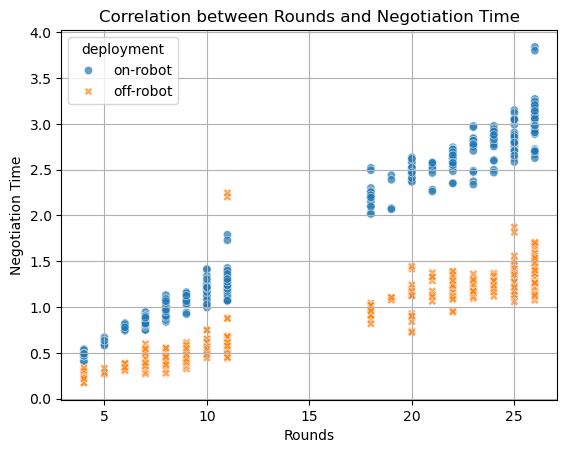

In [4]:
sns.scatterplot(data=plotting_df[(plotting_df["dispositions"] <= 100) & (plotting_df["rounds"]< 35)], x='rounds', y='negotiation_time', hue='deployment', style='deployment', palette='tab10', alpha=0.7)
plt.title('Correlation between Rounds and Negotiation Time')
plt.xlabel('Rounds')
plt.ylabel('Negotiation Time')
plt.grid(True)
plt.show()

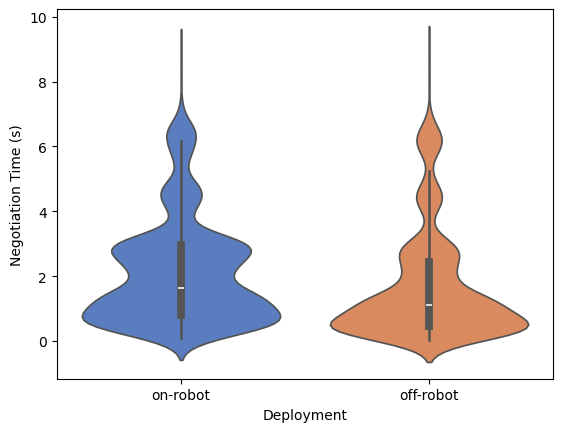

In [5]:
filtered_df = df[df["dispositions"] <= 100]
sns.violinplot(data=filtered_df, x='deployment', y='negotiation_time', palette='muted', hue='deployment')
plt.xlabel('Deployment')
plt.ylabel('Negotiation Time (s)')
# plt.grid(True)
plt.show()

In [6]:
stats = filtered_df.groupby(['deployment'])['negotiation_time'].describe()
stats

,count,mean,std,min,25%,50%,75%,max
deployment,,,,,,,,
off-robot,3000.0,1.698606,1.688644,0.037,0.47775,1.1120,2.43800,9.036
on-robot,2376.0,2.150905,1.632472,0.108,0.79500,1.6335,2.96175,8.934
